In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Line,Grid
os.chdir('C:/代码方案/Englishname')
%matplotlib inline

In [2]:
df = pd.read_csv('English-name.csv')

In [3]:
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [4]:
df.isnull().sum()

Id        0
Name      0
Year      0
Gender    0
Count     0
dtype: int64

In [5]:
df.describe()

,Id,Year,Count
count,1.924665e+06,1.924665e+06,1.924665e+06
mean,9.623330e+05,1.974851e+03,1.808733e+02
std,5.556031e+05,3.402948e+01,1.533337e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.811670e+05,1.951000e+03,7.000000e+00
50%,9.623330e+05,1.985000e+03,1.200000e+01
75%,1.443499e+06,2.003000e+03,3.200000e+01
max,1.924665e+06,2.017000e+03,9.968600e+04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 73.4+ MB


## TOP 15 English name for male, female in 2010-2017

In [7]:
top15_boy = df.loc[(df['Year'].isin(list(range(2010,2018)))) & (df['Gender'] == 'M'), :].groupby('Name').Count.sum().nlargest(15)

In [8]:
list(top15_boy.index)

['Noah',
 'Jacob',
 'Mason',
 'Liam',
 'William',
 'Ethan',
 'Michael',
 'Alexander',
 'James',
 'Daniel',
 'Elijah',
 'Aiden',
 'Jayden',
 'Benjamin',
 'Matthew']

In [9]:
data_top15_boy = df.loc[(df['Year'].isin(list(range(2010,2018)))) & (df['Gender'] == 'M') & 
                          (df['Name']).isin(list(top15_boy.index)), :]

In [10]:
data_top15_boy.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)

<ipython-input-10-f5b14899ba50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top15_boy.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)


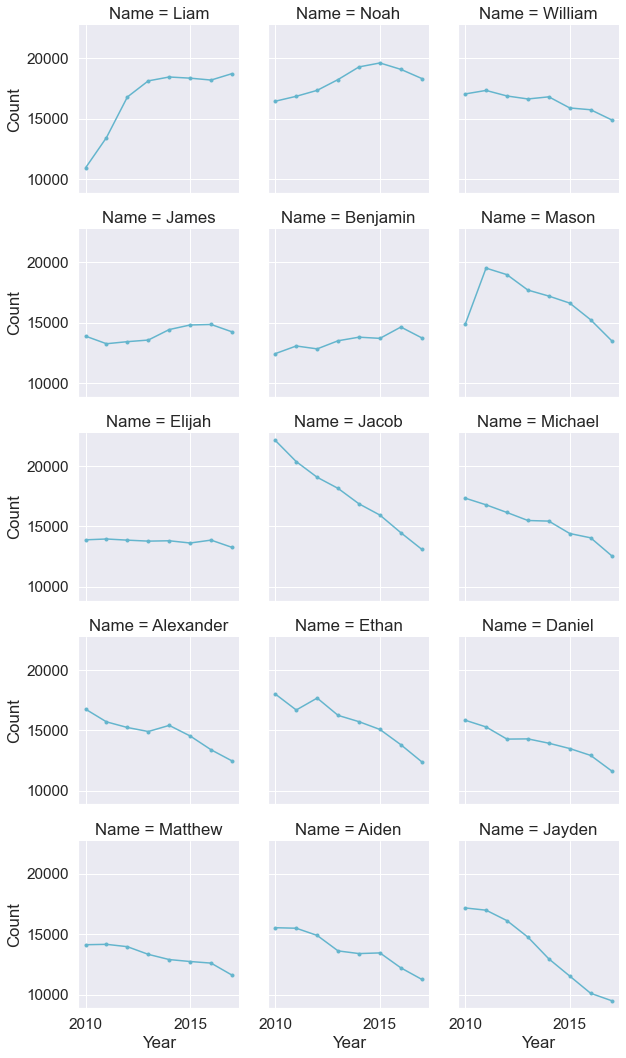

In [11]:
sns.set(font_scale=1.4)
g = sns.FacetGrid(data_top15_boy, col="Name", col_wrap=3)
g = g.map(plt.plot, "Year", "Count",color="c",marker=".")
g.set()

In [12]:
top15_girl = df.loc[(df['Year'].isin(list(range(2010,2018)))) & (df['Gender'] == 'F'), :].groupby('Name').Count.sum().nlargest(15)

In [13]:
list(top15_girl.index)

['Emma',
 'Sophia',
 'Olivia',
 'Isabella',
 'Ava',
 'Mia',
 'Emily',
 'Abigail',
 'Madison',
 'Elizabeth',
 'Charlotte',
 'Chloe',
 'Ella',
 'Amelia',
 'Avery']

<ipython-input-14-5ff68164d841>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top15_girl.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)


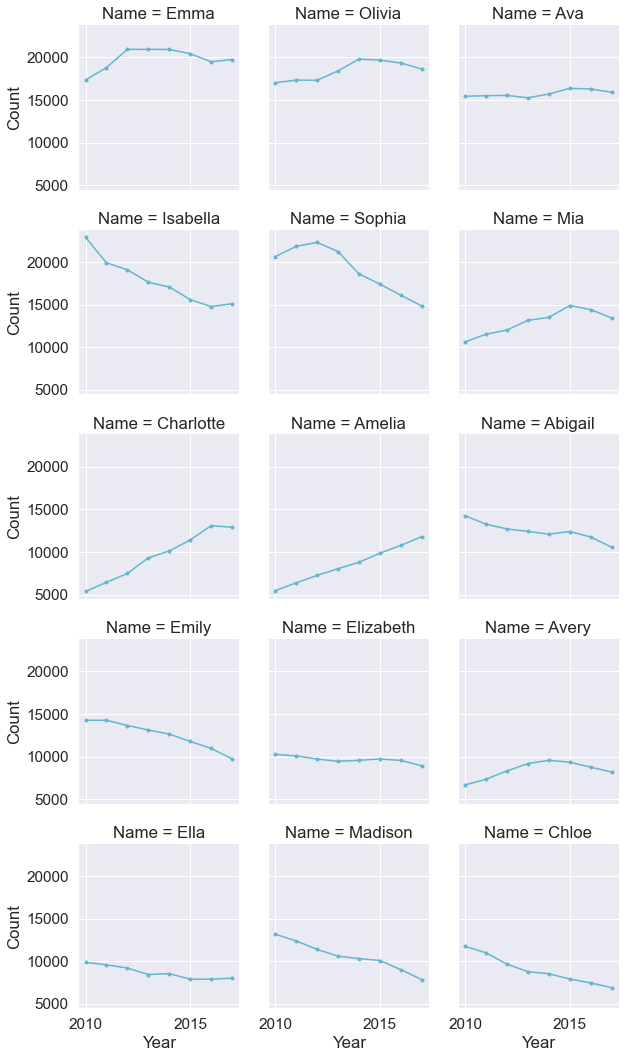

In [14]:
data_top15_girl = df.loc[(df['Year'].isin(list(range(2010,2018)))) & (df['Gender'] == 'F') & 
                          (df['Name']).isin(list(top15_girl.index)),:]                          
data_top15_girl.sort_values(by = ['Year', 'Count'], ascending=False, inplace=True)
sns.set(font_scale=1.4)
g = sns.FacetGrid(data_top15_girl, col="Name", col_wrap=3)
g = g.map(plt.plot, "Year", "Count",color="c",marker=".")

In [15]:
decades = df[df['Year']>=1920]
decades['decade'] = pd.cut(decades['Year'], [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2018], 
                                labels = ['20s','30s','40s', '50s','60s','70s','80s','90s','00s','10s'],right=False)

<ipython-input-15-7396d4dba10e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decades['decade'] = pd.cut(decades['Year'], [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2018],


In [16]:
decade = decades.groupby(['decade', 'Gender', 'Name']).Count.sum().groupby(level=[0,1]).nlargest(1)

Text(0.5, 0, 'Percentage')

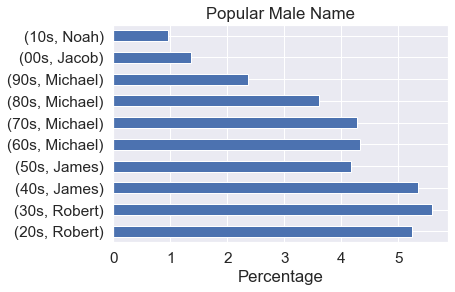

In [17]:
decade_boy_count = decade.iloc[decade.index.get_level_values(3)=='M'].reset_index(level=[0,1,3], drop=True)
decade_boy_total = decades[decades['Gender']=='M'].groupby('decade').Count.sum()
decade_boy_pct = (decade_boy_count/decade_boy_total*100).round(2)
ax = decade_boy_pct.plot.barh(title='Popular Male Name')
ax.set_ylabel('')
ax.set_xlabel('Percentage')

Text(0.5, 0, 'Percentage')

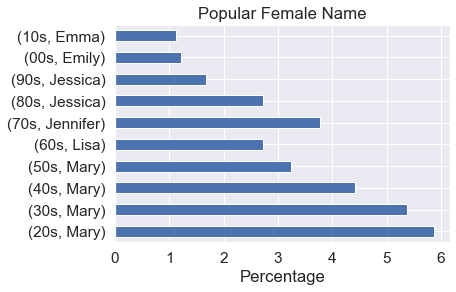

In [18]:
decade_girl_count = decade.iloc[decade.index.get_level_values(3)=='F'].reset_index(level=[0,1,3], drop=True)
decade_girl_total = decades[decades['Gender']=='F'].groupby('decade').Count.sum()
decade_girl_pct = (decade_girl_count/decade_girl_total*100).round(2)
ax = decade_girl_pct.plot.barh(title='Popular Female Name')
ax.set_ylabel('')
ax.set_xlabel('Percentage')